# Final Test - Python
## Febi Andika Dani Fajar Suryawan

## 1. Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision Tree

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

## 2. Sebutkan setidaknya 2 library untuk fungsi visualisasi di python

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Import loan_data.csv.
<br>
Identifikasi tipe data dari masing-masing variable.
<br>Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.

In [5]:
# Import loan_data
data=pd.read_csv("loan_data.csv")

In [8]:
# Identifikasi tipe data dari masing-masing variabel
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [9]:
# Tampilkan 5 baris pertama
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
# Summary statistic untuk data numerik
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
# Summary statistic untuk data kategorik
data['purpose'].describe()

count                   9578
unique                     7
top       debt_consolidation
freq                    3957
Name: purpose, dtype: object

## 4. Lakukan pengecekan missing data dan duplicated-row.
<br>
Jika ada, sebutkan kolom apa yang ada missing data.
<br>
Apakah ada duplicated-row?

In [14]:
# Check missing data
data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**Tidak ada missing data dari semua kolom pada data loan**

In [17]:
print("Banyak duplicated-row pada data adalah: ",data.duplicated().sum())

Banyak duplicated-row pada data adalah:  0


## 5. Lakukan pengecekan variabel target.
<br>
Ada berapa kategori pada variable target?
<br>
Berapa proporsinya?
<br>
Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

In [20]:
# Check berapa kategori
print ("Banyaknya kategori pada variabel target adalah:",data["not.fully.paid"].nunique())

Banyaknya kategori pada variabel target adalah: 2


In [28]:
# Proporsi target
prop=round(data["not.fully.paid"].value_counts()/len(data)*100,2)
print(prop)

0    83.99
1    16.01
Name: not.fully.paid, dtype: float64


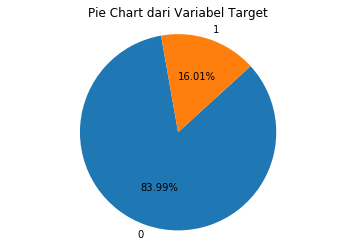

In [39]:
prop1=data['not.fully.paid'].value_counts()

plt.pie(prop1, labels=prop1.index,autopct='%1.2f%%',startangle=100)
plt.axis('equal')
plt.title('Pie Chart dari Variabel Target')
plt.show()

## 6. Berapa variansi (ragam) nilai installment?

In [71]:
# Mengambil nilai variansi
print("Variansi dari nilai installment adalah", round((data["installment"].var()),2))

Variansi dari nilai installment adalah 42878.52


## 7. Berapa nilai simpangan kuartil pada variable ‘installment’?

In [45]:
q3=data["installment"].quantile(0.75)
q1=data["installment"].quantile(0.25)
print("Nilai simpangan kuartil pada variabel installment adalah",round((q3-q1),2))

Nilai simpangan kuartil pada variabel installment adalah 268.99


## 8. Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

In [53]:
data[['purpose','installment']].groupby('purpose').max().sort_values(by='installment',ascending=False)

,installment
purpose,
debt_consolidation,940.14
small_business,926.83
credit_card,922.42
all_other,916.95
home_improvement,902.06
major_purchase,898.55
educational,861.88


## 9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.
<br>
Ada berapa kategori pada variable tersebut?
<br>
Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

In [54]:
# Check berapa kategori
print ("Banyaknya kategori pada variabel purpose adalah:",data["purpose"].nunique())

Banyaknya kategori pada variabel purpose adalah: 7


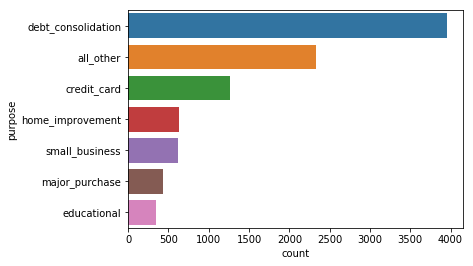

In [64]:
purp=data['purpose'].value_counts()
sns.countplot(y=data['purpose'],order=purp.index)

## 10. Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target

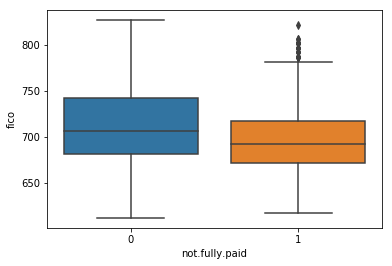

In [68]:
sns.boxplot(x=data['not.fully.paid'],y=data['fico'])

**Dari boxplot diatas dapat nilai fico tidak terlalu berpengaruh terhadap nilai target. Hal ini dikarenakan distribusi nilai dari variabel fico tidak berbeda jauh untuk setiap nilai target.**

## 11. Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? 
Jelaskan argumen anda.
Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

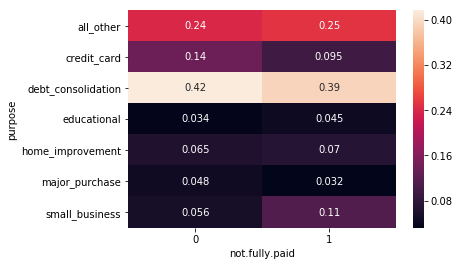

In [96]:
pr=pd.crosstab(data['purpose'],data['not.fully.paid'],normalize='columns')
sns.heatmap(pr,annot=True)

**Dilihat dari heatmap di atas, dapat tidak dapat dibilang bahwa variabel purpose merupakan predictor yang potensial untuk memprediksi target. Hal ini dikarenakan tidak terdapat perbedaan yang signifikan antara proporsi antara tiap purpose terhadap tiap target pada not.fully.paid. Hanya terdapat cukup perbedaan pada purpose credit_card dan small_business yang dapat membedakan tiap target.**

## 12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [77]:
avg=data[data['purpose'] == 'credit_card'].mean()
print('Nilai rata-rata dari int.rate untuk purpose dengan kategori credit_card adalah',round(avg['int.rate'],2))

Nilai rata-rata dari int.rate untuk purpose dengan kategori credit_card adalah 0.12


## 13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [83]:
cou=len(data[(data['installment']>200) & (data['purpose'] == 'educational')])
print('Jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) adalah',cou)

Jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) adalah 137


## 14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [85]:
loans3=data[data['purpose']=='credit_card']
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


## 15. Siapkan data untuk pemodelan.

Ubah data kategorik menjadi dummy variabel.

Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [87]:
# Get dummies variabel
final_data=pd.get_dummies(data,drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## 16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [88]:
y=final_data['not.fully.paid']
X=final_data.drop(columns='not.fully.paid')

In [90]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [136]:
# Membuat model decision tree
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions'

In [137]:
predictions=dtree.predict(X_test)

## 19. Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [138]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: \n",confusion_matrix(predictions,y_test))

Confusion Matrix: 
 [[1997  337]
 [ 434  106]]


Dari confusion matrix di atas diperoleh bahwa model belum cukup baik dalam memprediksi nilai positif (nilai target = 1) dikarenakan nilai true positif yang rendah dan nilai false positif yang tinggi.

## 20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [141]:
cov = confusion_matrix(predictions,y_test)
total=sum(sum(cov))
accuracy=(cov[0,0]+cov[1,1])/total
print('Accuracy    : ', round(accuracy*100,2))

specificity = cov[0,0]/(cov[0,0]+cov[0,1])
print('Specificity : ', round(specificity*100,2))

sensitivity = cov[1,1]/(cov[1,0]+cov[1,1])
print('Sensitivity : ', round(sensitivity*100,2))

Accuracy    :  73.17
Specificity :  85.56
Sensitivity :  19.63


Dapat dilihat bahwa model belum cukup baik. Hal ini dikarenakan data yang digunakan imbalance diantara dua kategori target sehingga diperlukan analisis lebih lanjut untuk meningkatkan akurasi model.